### Identification of applicants who are capable of repaying loans

#### There are two risks associated with banks decision

- No approving: applicant might be able to replay the loan, not approving will be loss for bank
- Approving: applicant might not repay the loan, hence again loss to bank


#### Find driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [2]:
df_current_application = pd.read_csv('application_data.csv')
df_current_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
df_current_application[df_current_application['SK_ID_CURR']==100006]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_column_desc = pd.read_csv('columns_description.csv', encoding = 'ISO-8859-1')
df_column_desc

,Table,Row,Description,Special,Unnamed: 4
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


In [5]:
df_current_application.shape

(307511, 122)

In [6]:
df_current_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
df_current_application.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [8]:
df_current_application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [9]:
df_new = df_current_application.drop(df_current_application.loc[:,'FLAG_MOBIL':'FLAG_EMAIL'], axis=1, inplace=False)
df_new.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [10]:
df_new.drop(df_new.loc[:,'CNT_FAM_MEMBERS': 'LIVE_CITY_NOT_WORK_CITY' ], axis=1, inplace=True)

In [11]:
df_new.drop(df_new.loc[:,'EXT_SOURCE_1': 'AMT_REQ_CREDIT_BUREAU_QRT' ], axis=1, inplace=True)
df_new.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,Laborers,Business Entity Type 3,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,Core staff,School,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,Laborers,Government,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,Laborers,Business Entity Type 3,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,Core staff,Religion,0.0


In [12]:
df_new.shape

(307511, 25)

In [13]:
df_current_application = df_new

In [14]:
df_current_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,Laborers,Business Entity Type 3,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,Core staff,School,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,Laborers,Government,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,Laborers,Business Entity Type 3,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,Core staff,Religion,0.0


In [15]:
df_current_application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

### Checking missing value percentage in Current Application Dataset

In [16]:
df_current_application.isnull().sum()/df_new.shape[0]*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
OWN_CAR_AGE                   65.990810
OCCUPATION_TYPE               31.345545
ORGANIZATION_TYPE              0.000000
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631


#### OWN_CAR_AGE has high percentage of data missing, hence the column can be dropped

In [17]:
df_current_application.drop('OWN_CAR_AGE', axis=1, inplace=True)

#### OCCUPATION_TYPE has almost 30% of records missing. Hence these records can be dropped as imputing them will distort the distribution

In [18]:
df_current_application= df_current_application[~df_current_application.OCCUPATION_TYPE.isnull()]
df_current_application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211120 entries, 0 to 307510
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  211120 non-null  int64  
 1   TARGET                      211120 non-null  int64  
 2   NAME_CONTRACT_TYPE          211120 non-null  object 
 3   CODE_GENDER                 211120 non-null  object 
 4   FLAG_OWN_CAR                211120 non-null  object 
 5   FLAG_OWN_REALTY             211120 non-null  object 
 6   CNT_CHILDREN                211120 non-null  int64  
 7   AMT_INCOME_TOTAL            211120 non-null  float64
 8   AMT_CREDIT                  211120 non-null  float64
 9   AMT_ANNUITY                 211108 non-null  float64
 10  AMT_GOODS_PRICE             210899 non-null  float64
 11  NAME_TYPE_SUITE             210213 non-null  object 
 12  NAME_INCOME_TYPE            211120 non-null  object 
 13  NAME_EDUCATION

In [19]:
df_current_application.isnull().sum()/df_new.shape[0]*100

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
FLAG_OWN_REALTY               0.000000
CNT_CHILDREN                  0.000000
AMT_INCOME_TOTAL              0.000000
AMT_CREDIT                    0.000000
AMT_ANNUITY                   0.003902
AMT_GOODS_PRICE               0.071867
NAME_TYPE_SUITE               0.294949
NAME_INCOME_TYPE              0.000000
NAME_EDUCATION_TYPE           0.000000
NAME_FAMILY_STATUS            0.000000
NAME_HOUSING_TYPE             0.000000
REGION_POPULATION_RELATIVE    0.000000
DAYS_BIRTH                    0.000000
DAYS_EMPLOYED                 0.000000
DAYS_REGISTRATION             0.000000
DAYS_ID_PUBLISH               0.000000
OCCUPATION_TYPE               0.000000
ORGANIZATION_TYPE             0.000000
AMT_REQ_CREDIT_BUREAU_YEAR    9.201947
dtype: float64

#### Now we have 3 columns which have null values. Since the percentage of missing records is less, we need to see how can these values be imputed for 
- AMT_GOODS_PRICE
- NAME_TYPE_SUITE
- AMT_REQ_CREDIT_BUREAU_YEAR

In [20]:
df_current_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,Business Entity Type 3,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,School,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,Government,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,Business Entity Type 3,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,Religion,0.0


 - Analysing AMT_GOODS_PRICE

In [21]:
df_current_application.AMT_GOODS_PRICE.dtype

dtype('float64')

In [22]:
df_current_application.AMT_GOODS_PRICE.mean()

548179.850008772

In [23]:
df_current_application.AMT_GOODS_PRICE.median()

450000.0

> It seems like mean for AMT_GOODS_PRICE is affected by an outlier so it is best to impute this feature with Median

 - Analysing NAME_TYPE_SUITE

In [24]:
df_current_application.NAME_TYPE_SUITE.unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Other_A', nan,
       'Children', 'Group of people', 'Other_B'], dtype=object)

** Other_A and Other_B doesn't signify any particular category so will need to handled as one category **

In [25]:
#filling Other_A and Other_B with Other
df_current_application['NAME_TYPE_SUITE'] = df_current_application['NAME_TYPE_SUITE'].replace(['Other_A','Other_B'], 'Other')

C:\Users\adity\AppData\Local\Temp/ipykernel_15656/203081712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_application['NAME_TYPE_SUITE'] = df_current_application['NAME_TYPE_SUITE'].replace(['Other_A','Other_B'], 'Other')


In [26]:
df_current_application.NAME_TYPE_SUITE.unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Other', nan,
       'Children', 'Group of people'], dtype=object)

In [27]:
df_current_application.NAME_TYPE_SUITE.value_counts()

Unaccompanied      171484
Family              26659
Spouse, partner      8144
Children             1878
Other                1863
Group of people       185
Name: NAME_TYPE_SUITE, dtype: int64

In [28]:
df_current_application.NAME_TYPE_SUITE.mode()

0    Unaccompanied
dtype: object

> Since this is categorical column filling NaN can be filled with Mode

- Analyzing AMT_REQ_CREDIT_BUREAU_YEAR

In [29]:
df_current_application.AMT_REQ_CREDIT_BUREAU_YEAR.dtype

dtype('float64')

In [30]:
df_current_application.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     49407
1.0     44812
2.0     34881
3.0     22921
4.0     14043
5.0      7852
6.0      4472
7.0      2406
8.0      1297
9.0       663
12.0       17
11.0       14
10.0       14
14.0        7
13.0        6
17.0        4
15.0        2
23.0        1
16.0        1
22.0        1
21.0        1
19.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [31]:
df_current_application.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    182823.000000
mean          1.857857
std           1.823299
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          23.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

> AMT_REQ_CREDIT_BUREAU_YEAR could be imputed Median

In [32]:
df_current_application.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OCCUPATION_TYPE                object
ORGANIZATION_TYPE              object
AMT_REQ_CREDIT_BUREAU_YEAR    float64
dtype: object

In [33]:
df_current_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,Business Entity Type 3,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,School,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,Government,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,Business Entity Type 3,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,Religion,0.0


> Data types for all the columns are correct.

### Checking for Outliers in dataset
#### We need to plot boxplot to check for the outliers. Any value which is outside lower and upper whisker is considered as outlier in statistics.

In [34]:
df_current_application.AMT_INCOME_TOTAL.describe() #datatype is correct

count    2.111200e+05
mean     1.757752e+05
std      2.751414e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

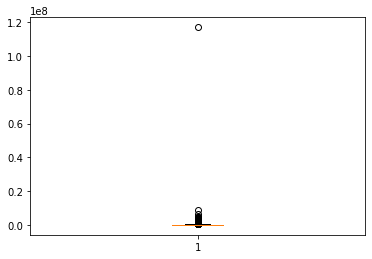

In [35]:
plt.boxplot(df_current_application.AMT_INCOME_TOTAL)
plt.show()

> This feature has one outlier with maximum value if 117,000,000 salary. Salary for everyone else is almost same which is around 50th percentile

In [60]:
df_current_application.AMT_CREDIT.describe() # Datatype is correct

count    2.111200e+05
mean     6.103016e+05
std      4.057490e+05
min      4.500000e+04
25%      2.779695e+05
50%      5.212800e+05
75%      8.248230e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

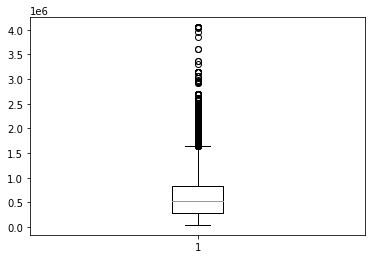

In [37]:
plt.boxplot(df_current_application.AMT_CREDIT)
plt.show()

> Value outside 1.6e+06 in above whiskers are outliers

In [38]:
(df_current_application.AMT_ANNUITY.values < 0).any() # No negative values are present

False

In [39]:
df_current_application.AMT_ANNUITY.isnull().any()

True

In [61]:
df_current_application.AMT_ANNUITY.describe() # datatype is correct

count    211108.000000
mean      27793.198221
std       14622.071200
min        1980.000000
25%       17077.500000
50%       25836.750000
75%       35586.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

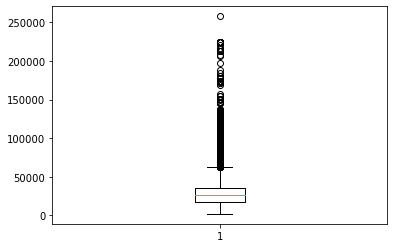

In [58]:

plt.boxplot(df_current_application.AMT_ANNUITY.dropna())
plt.show()

> It is clear that these features have outliers from boxplot. Since this feature also have missing values they should be imputed with Median.

In [42]:
(df_current_application.AMT_GOODS_PRICE.values < 0).any()

False

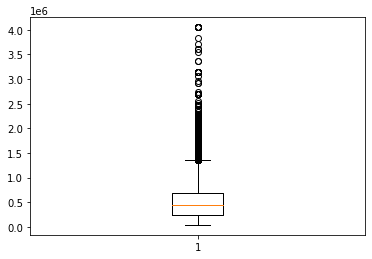

In [59]:
plt.boxplot(df_current_application.AMT_GOODS_PRICE.dropna())
plt.show()

> It from descripton it is clear that these features have outliers. Since this feature also have missing values they should be imputed with Median.

In [45]:
df_current_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,Business Entity Type 3,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,School,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,Government,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,Business Entity Type 3,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,Religion,0.0


In [48]:
df_column_desc

,Table,Row,Description,Special,Unnamed: 4
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


In [54]:
df_column_desc.iloc[17:21,:]

,Table,Row,Description,Special,Unnamed: 4
17,20,application_data,DAYS_BIRTH,Client's age in days at the time of application,time only relative to the application
18,21,application_data,DAYS_EMPLOYED,How many days before the application the perso...,time only relative to the application
19,22,application_data,DAYS_REGISTRATION,How many days before the application did clien...,time only relative to the application
20,23,application_data,DAYS_ID_PUBLISH,How many days before the application did clien...,time only relative to the application


> Above columns have have negative values. Converting them to positve values

In [62]:
df_current_application['DAYS_BIRTH'] = df_current_application['DAYS_BIRTH'].abs()

C:\Users\adity\AppData\Local\Temp/ipykernel_15656/3437772204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_application['DAYS_BIRTH'] = df_current_application['DAYS_BIRTH'].abs()


In [63]:
df_current_application['DAYS_BIRTH']

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307504    16705
307506     9327
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH, Length: 211120, dtype: int64

In [64]:
df_current_application['DAYS_EMPLOYED'] = df_current_application['DAYS_EMPLOYED'].abs()

C:\Users\adity\AppData\Local\Temp/ipykernel_15656/1349910413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_application['DAYS_EMPLOYED'] = df_current_application['DAYS_EMPLOYED'].abs()


In [65]:
df_current_application['DAYS_EMPLOYED']

0          637
1         1188
2          225
3         3039
4         3038
          ... 
307504    7258
307506     236
307508    7921
307509    4786
307510    1262
Name: DAYS_EMPLOYED, Length: 211120, dtype: int64

In [66]:
df_current_application['DAYS_REGISTRATION'] = df_current_application['DAYS_REGISTRATION'].abs()

C:\Users\adity\AppData\Local\Temp/ipykernel_15656/1535718582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_application['DAYS_REGISTRATION'] = df_current_application['DAYS_REGISTRATION'].abs()


In [67]:
df_current_application['DAYS_REGISTRATION']

0         3648.0
1         1186.0
2         4260.0
3         9833.0
4         4311.0
           ...  
307504    9798.0
307506    8456.0
307508    6737.0
307509    2562.0
307510    5128.0
Name: DAYS_REGISTRATION, Length: 211120, dtype: float64

In [68]:
df_current_application['DAYS_ID_PUBLISH'] = df_current_application['DAYS_ID_PUBLISH'].abs()

C:\Users\adity\AppData\Local\Temp/ipykernel_15656/575560563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_application['DAYS_ID_PUBLISH'] = df_current_application['DAYS_ID_PUBLISH'].abs()


In [69]:
df_current_application['DAYS_ID_PUBLISH']

0         2120
1          291
2         2531
3         2437
4         3458
          ... 
307504     259
307506    1982
307508    5150
307509     931
307510     410
Name: DAYS_ID_PUBLISH, Length: 211120, dtype: int64

In [70]:
df_current_application['AMT_REQ_CREDIT_BUREAU_YEAR'].nunique()

22

#### Now we'll convert AMT_INCOME_TOTAL	 and AMT_CREDIT in Low, Medium and High bin to people in each category

In [76]:
low=df_current_application['AMT_INCOME_TOTAL'].quantile(0.25)
medium=df_current_application['AMT_INCOME_TOTAL'].quantile(0.50)
high=df_current_application['AMT_INCOME_TOTAL'].quantile(0.75)
maximum=df_current_application['AMT_INCOME_TOTAL'].max()

117000000.0

In [77]:

df_current_application['AMT_INCOME_TOTAL_Category'] = pd.cut(df_current_application['AMT_INCOME_TOTAL'],[low, medium, high,maximum ], labels = ['Low', 'medium', 'High'])


C:\Users\adity\AppData\Local\Temp/ipykernel_15656/2281270927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_application['AMT_INCOME_TOTAL_Category'] = pd.cut(df_current_application['AMT_INCOME_TOTAL'],[low, medium, high,maximum ], labels = ['Low', 'medium', 'High'])


In [79]:
df_current_application.AMT_INCOME_TOTAL_Category

0         medium
1           High
2            NaN
3            Low
4            Low
           ...  
307504       Low
307506       Low
307508       Low
307509    medium
307510       Low
Name: AMT_INCOME_TOTAL_Category, Length: 211120, dtype: category
Categories (3, object): ['Low' < 'medium' < 'High']

<AxesSubplot:>

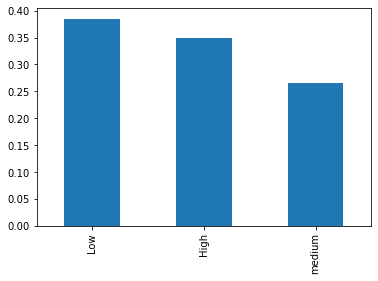

In [82]:
df_current_application.AMT_INCOME_TOTAL_Category.value_counts(normalize=True).plot.bar()

> We can see that maximum applicant's who have applied for loan fall into low income range

In [83]:
low=df_current_application['AMT_CREDIT'].quantile(0.25)
medium=df_current_application['AMT_CREDIT'].quantile(0.50)
high=df_current_application['AMT_CREDIT'].quantile(0.75)
maximum=df_current_application['AMT_CREDIT'].max()

In [84]:

df_current_application['AMT_CREDIT_Category'] = pd.cut(df_current_application['AMT_CREDIT'],[low, medium, high,maximum ], labels = ['Low', 'medium', 'High'])


C:\Users\adity\AppData\Local\Temp/ipykernel_15656/3756886407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_application['AMT_CREDIT_Category'] = pd.cut(df_current_application['AMT_CREDIT'],[low, medium, high,maximum ], labels = ['Low', 'medium', 'High'])


In [85]:
df_current_application.AMT_CREDIT_Category

0            Low
1           High
2            NaN
3            Low
4            Low
           ...  
307504       Low
307506       NaN
307508    medium
307509       Low
307510    medium
Name: AMT_CREDIT_Category, Length: 211120, dtype: category
Categories (3, object): ['Low' < 'medium' < 'High']

<AxesSubplot:>

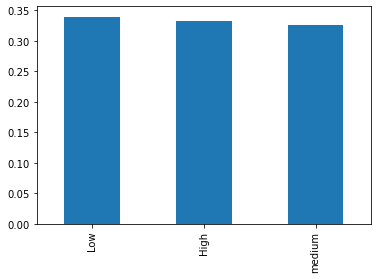

In [86]:
df_current_application.AMT_CREDIT_Category.value_counts(normalize=True).plot.bar()

> There is not much difference in the credit asked for approval

### Moving on to Data Analysis part

#### We first need to check if there is any imbalance in the Applicate Data dataset

In [87]:
df_current_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_Category,AMT_CREDIT_Category
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,Business Entity Type 3,1.0,medium,Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,School,0.0,High,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,Government,0.0,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,Business Entity Type 3,NaN,Low,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,Religion,0.0,Low,Low


In [89]:
100*df_current_application.TARGET.value_counts(normalize = True)

0    91.214949
1     8.785051
Name: TARGET, dtype: float64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

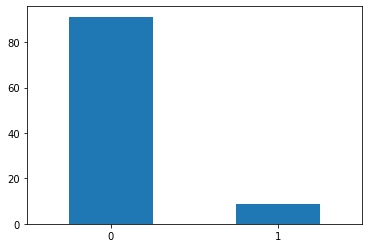

In [95]:
(100*df_current_application.TARGET.value_counts(normalize = True)).plot.bar()
plt.xticks(rotation=0)

> There is high Imbalance in dataset so we will divide the data set into respective categories for furthur analysis

In [102]:
df_current_application_target_1 = df_current_application[df_current_application['TARGET']==1]
df_current_application_target_0 = df_current_application[df_current_application['TARGET']==0]

In [99]:
df_current_application_target_1.shape

(18547, 26)

In [103]:
df_current_application_target_0.shape

(192573, 26)

#### Univariate Analysis
- NAME_INCOME_TYPE
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS
- NAME_HOUSING_TYPE

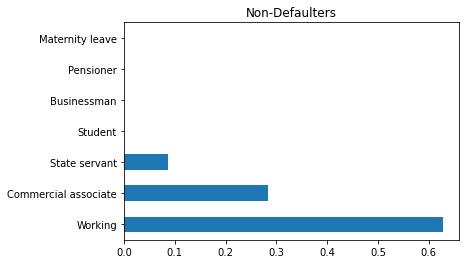

In [104]:
#NAME_INCOME_TYPE for TARGET=0
df_current_application_target_0.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.title('Non-Defaulters')
plt.show()

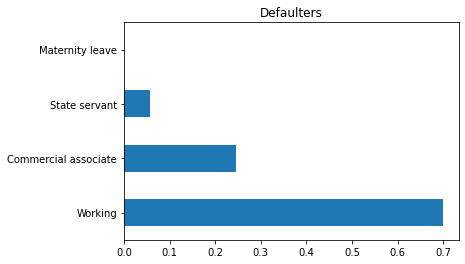

In [105]:
#NAME_INCOME_TYPE for TARGET=1
df_current_application_target_1.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.title('Defaulters')
plt.show()


- Commercial associstes default more as compared to State servents as observed from the graph.

- Majority of defaulter comes from income type working but are also a major chunk from working people who do not default

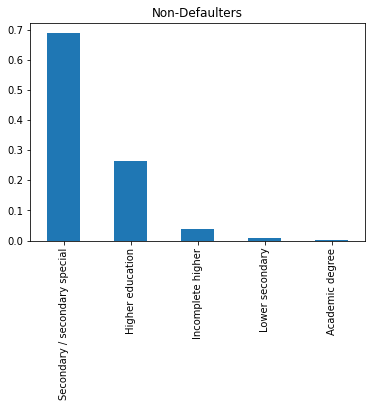

In [107]:
#NAME_EDUCATION_TYPE for Target=0

df_current_application_target_0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Non-Defaulters')
plt.show()


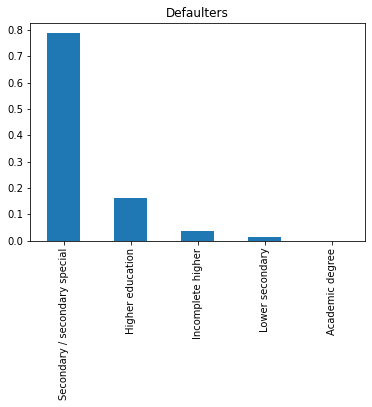

In [108]:
#NAME_EDUCATION_TYPE for Target=1
df_current_application_target_1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Defaulters')
plt.show()

- We can see thatsecondary/special educated people are applying loans high in number
- Academic degree educated people are applying loan in least count.
- Both of these category seem to have same defaulters and non-defaulters

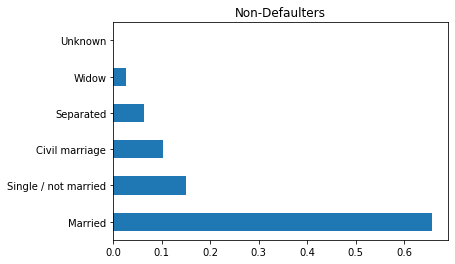

In [110]:
#NAME_FAMILY_STATUS for Target=0
df_current_application_target_0.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.title('Non-Defaulters')
plt.show()

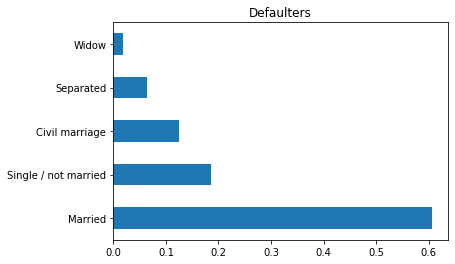

In [111]:
#NAME_FAMILY_STATUS for Target=1
# for TARGET=1
df_current_application_target_1.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.title('Defaulters')
plt.show()

- There are few case with status as Unknown who do not default
- Married people take more loan and this does not change the fact that they default or do not default
- Single people default more but difference is not very high

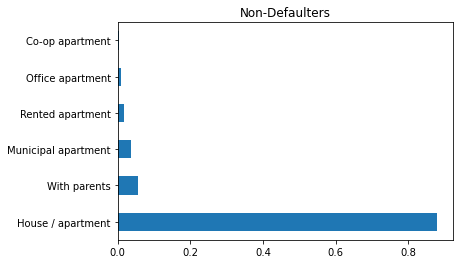

In [114]:
#NAME_HOUSING_TYPE for Target=0
df_current_application_target_0.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh()
plt.title('Non-Defaulters')
plt.show()

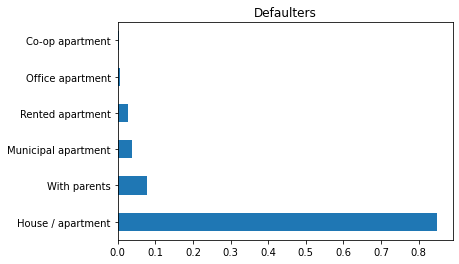

In [115]:
#NAME_HOUSING_TYPE for Target=1
# for TARGET=1
df_current_application_target_1.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh()
plt.title('Defaulters')
plt.show()

- There is not specific pattern here. Most of the defaulters and non-defaulters own a house

### Compairing target feature with various Categorical feature

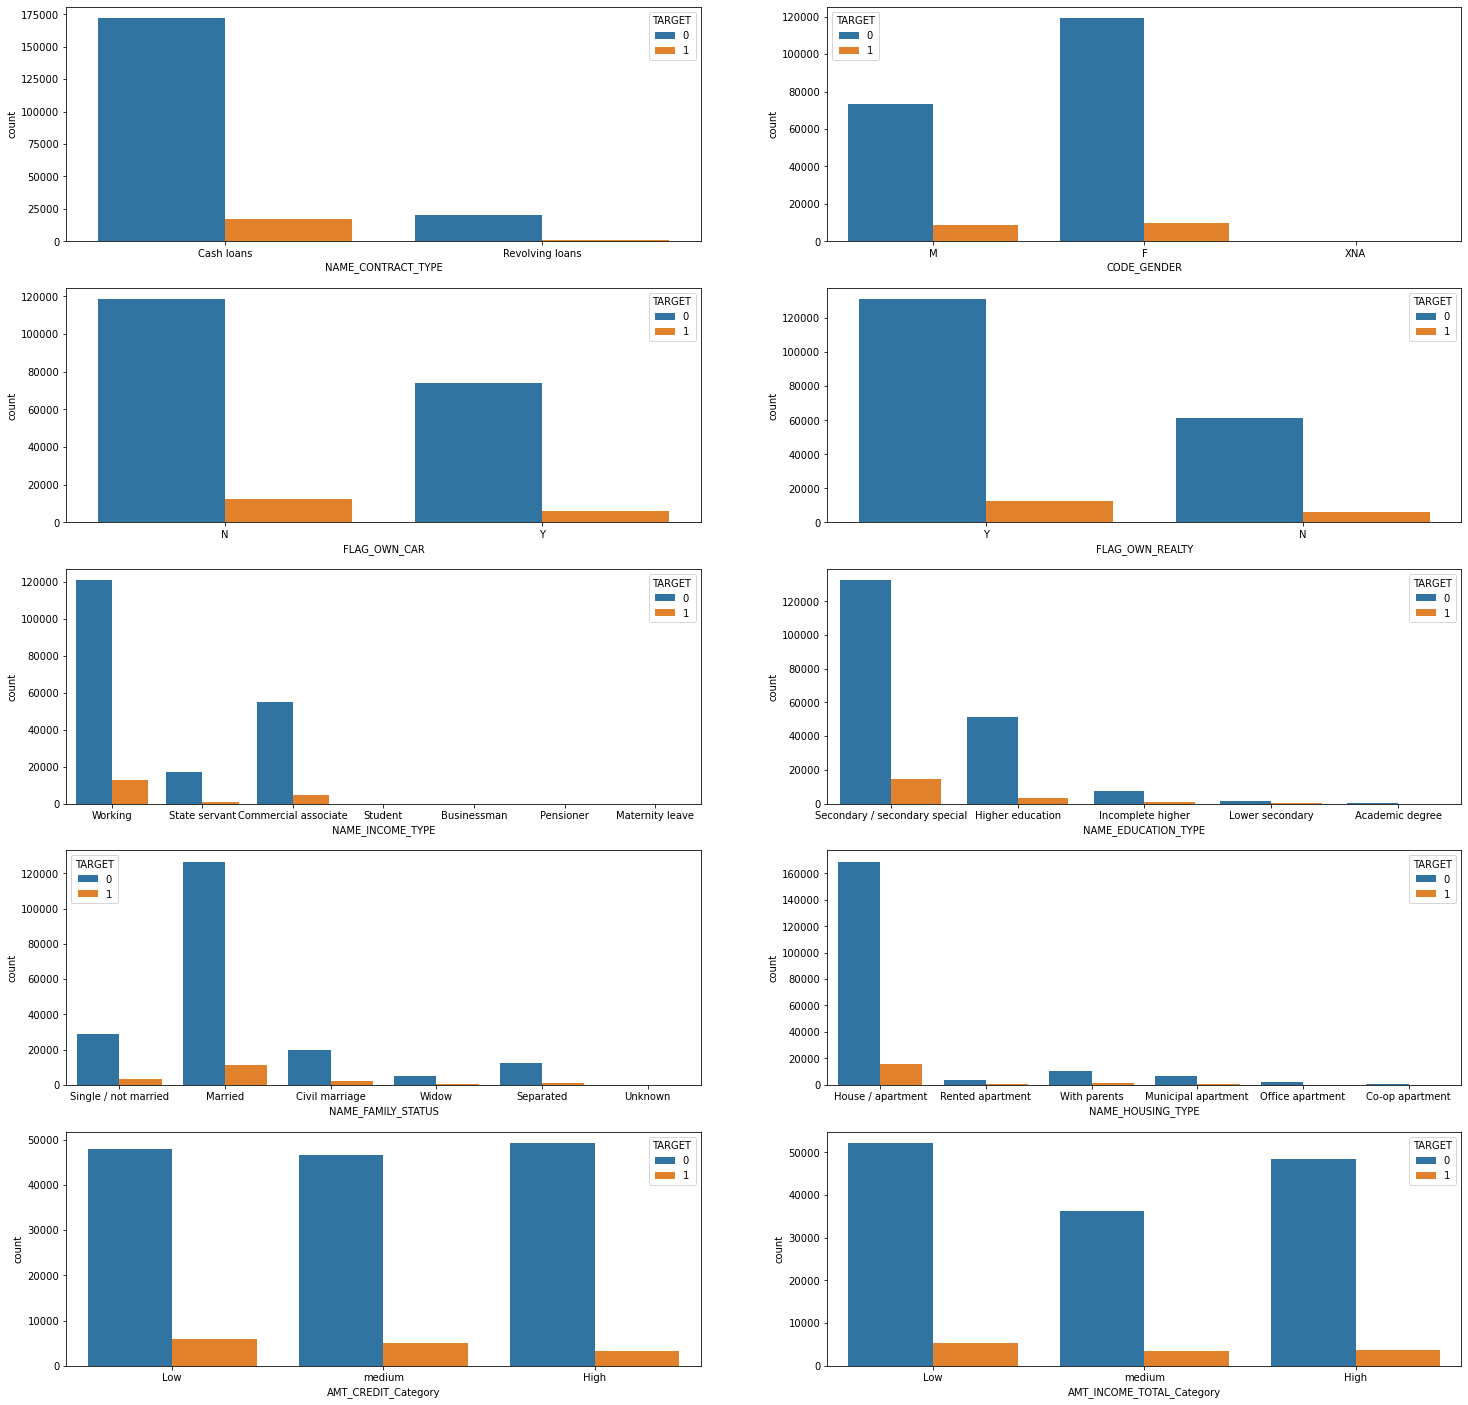

In [120]:
categorical_feature_to_compare = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',
                     'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                     'NAME_HOUSING_TYPE','AMT_CREDIT_Category','AMT_INCOME_TOTAL_Category']

plt.figure(figsize=(25,25))
for i in (enumerate(categorical_feature_to_compare)):
    plt.subplot(len(categorical_feature_to_compare)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='TARGET',data=df_current_application)
plt.show()

- More people take more cash loans and are more likely to default
- Females take more loans and are less likely to default compared to men
- People who don't have car take more loans
- People who have real estate take more loan
- People in working class category take more loan
- People whose education type is secondary/ secondary special take more loan
- Married people take more loan
- People who have house or apartment take more loan
- People who take more credit are less deafulters


### Compairing target feature with various Numerical feature

In [130]:
df_current_application.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_Category,AMT_CREDIT_Category
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,Business Entity Type 3,1.0,medium,Low


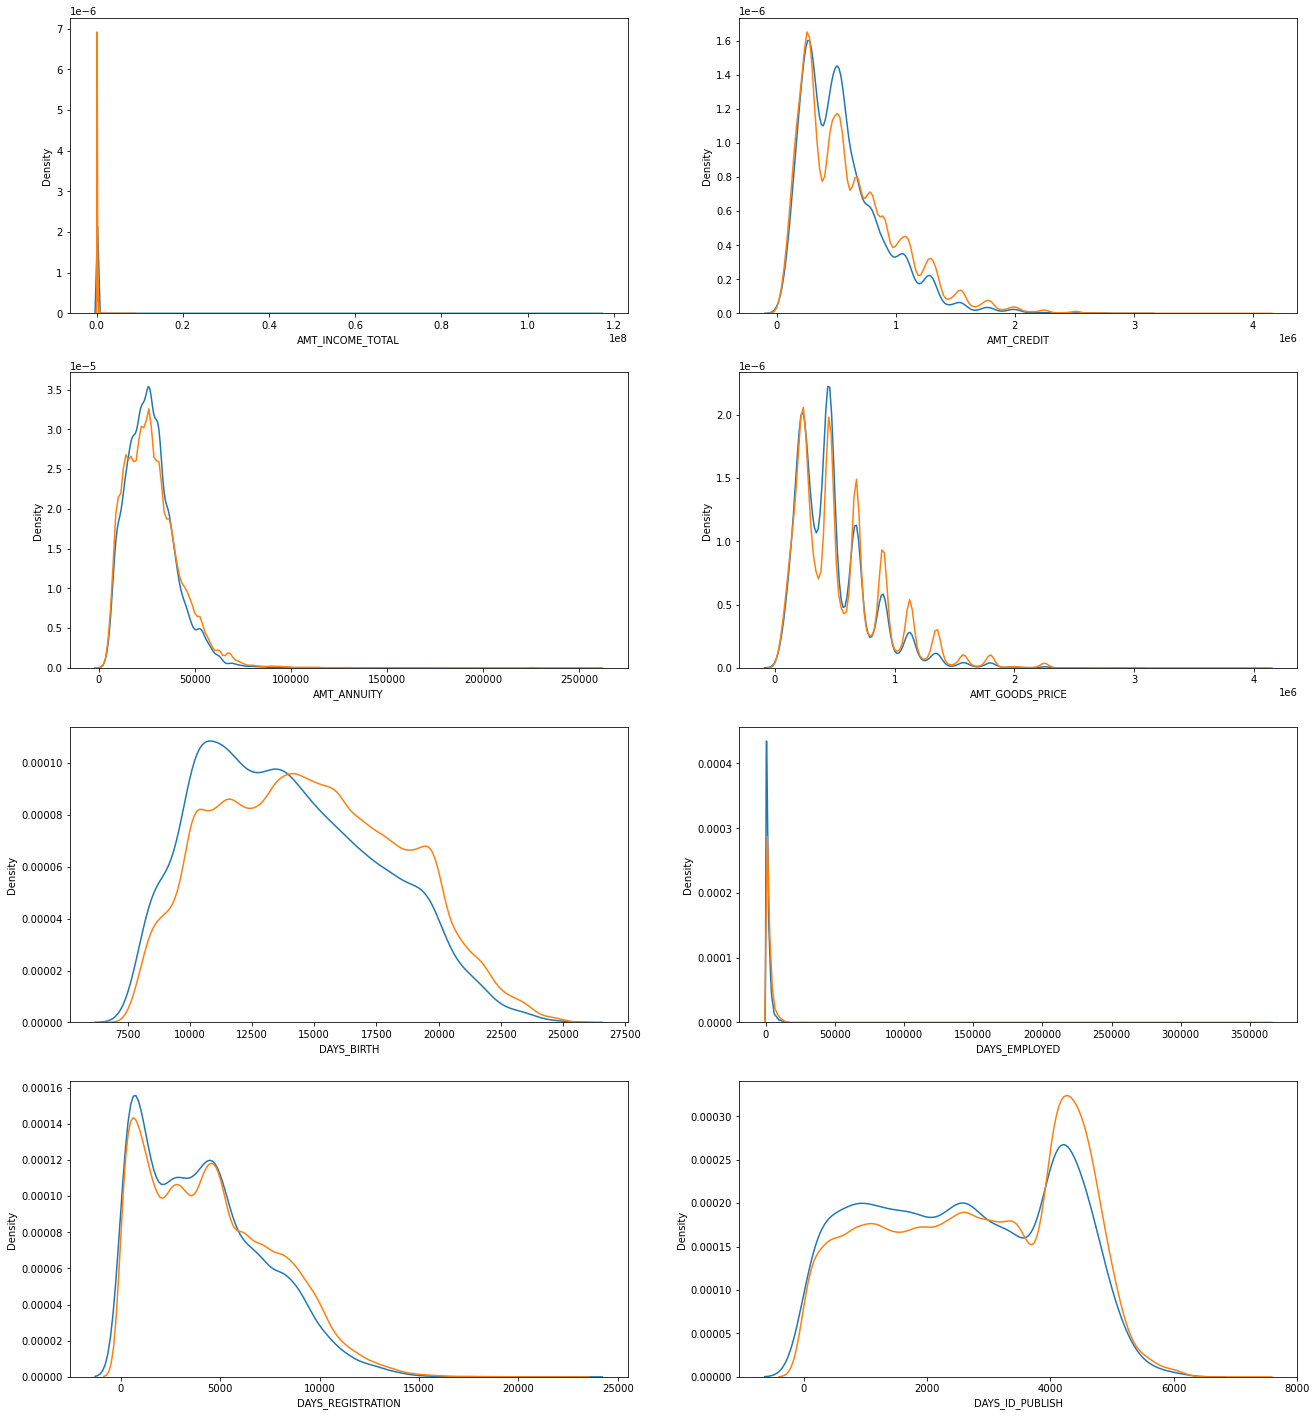

In [131]:
numerical_features_to_compare=['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE',
                  'DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']

plt.figure(figsize=(22,25))
for i in (enumerate(numerical_features_to_compare)):
    plt.subplot(len(numerical_features_to_compare)//2,2,i[0]+1)
    sns.distplot(df_current_application_target_1[i[1]].dropna(),hist=False,label='Target : Defaulter')
    sns.distplot(df_current_application_target_0[i[1]].dropna(),hist=False,label='Target : Non-Defaulter')
plt.show()

- People with lower income tends to default more.
- More people take loan of small amount. High amount loan is taken by only few people.
- Low amount annunity represent more loans are taken.
- People take more loan if goods price amount is less
- People with age 10000 days to 15000 days take more loan compared to other ages.
- Employed people take less loan also they tend to default less.
- If registration is done within first 2000 days more loan is taken there is a small dip after that between in general more    loan is taken within first 5000 days of registration
- People with ID publised between 4000 and 5000 take more loans but also comparatively default more.




### Performing Bivariate Analysis on 
- Categorical-Categorical
- Categorical-Continuous
- Continuous-Continuous

In [136]:
df_current_application.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_Category,AMT_CREDIT_Category
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,Business Entity Type 3,1.0,medium,Low


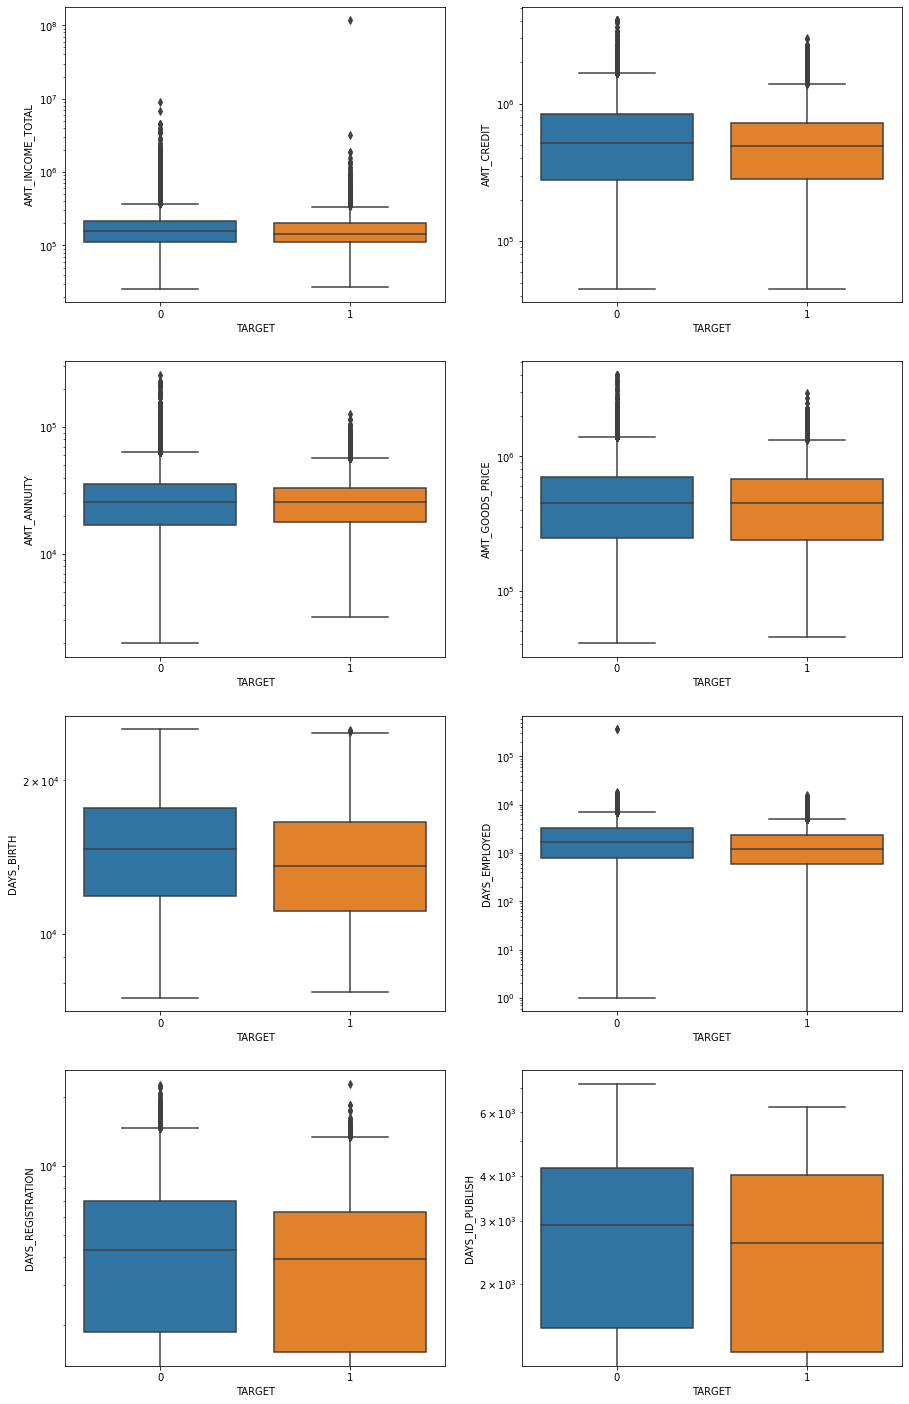

In [144]:
# Bivariate for Numerical Features

numerical_features=['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE',
                  'DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']

plt.figure(figsize=(15,25))
for i in (enumerate(numerical_features)):
    plt.subplot(len(numerical_features)//2,2,i[0]+1)
    sns.boxplot(x='TARGET',y=df_current_application[i[1]].dropna(),data=df_current_application)
    plt.yscale('log')
plt.show() 

- DAYS_BIRTH, DAYS_EMPLOYED and DAYS_ID_PUBLISH don't have many outliers
- Average income of people of defaulters category is less
- There is a huge variance in AMT_CREDIT feature and people who have more credit default less
- Variance for AMT_ANNUITY is more for people who do not default
- AMT_GOOD_PRICE have more outliers for people who do not default
- Average age of people who default is less than the people who do not default
- People who are employed for more time are less defaulters
- It is observed that in some case Days to publish id for non-defaulters is more than defaulters

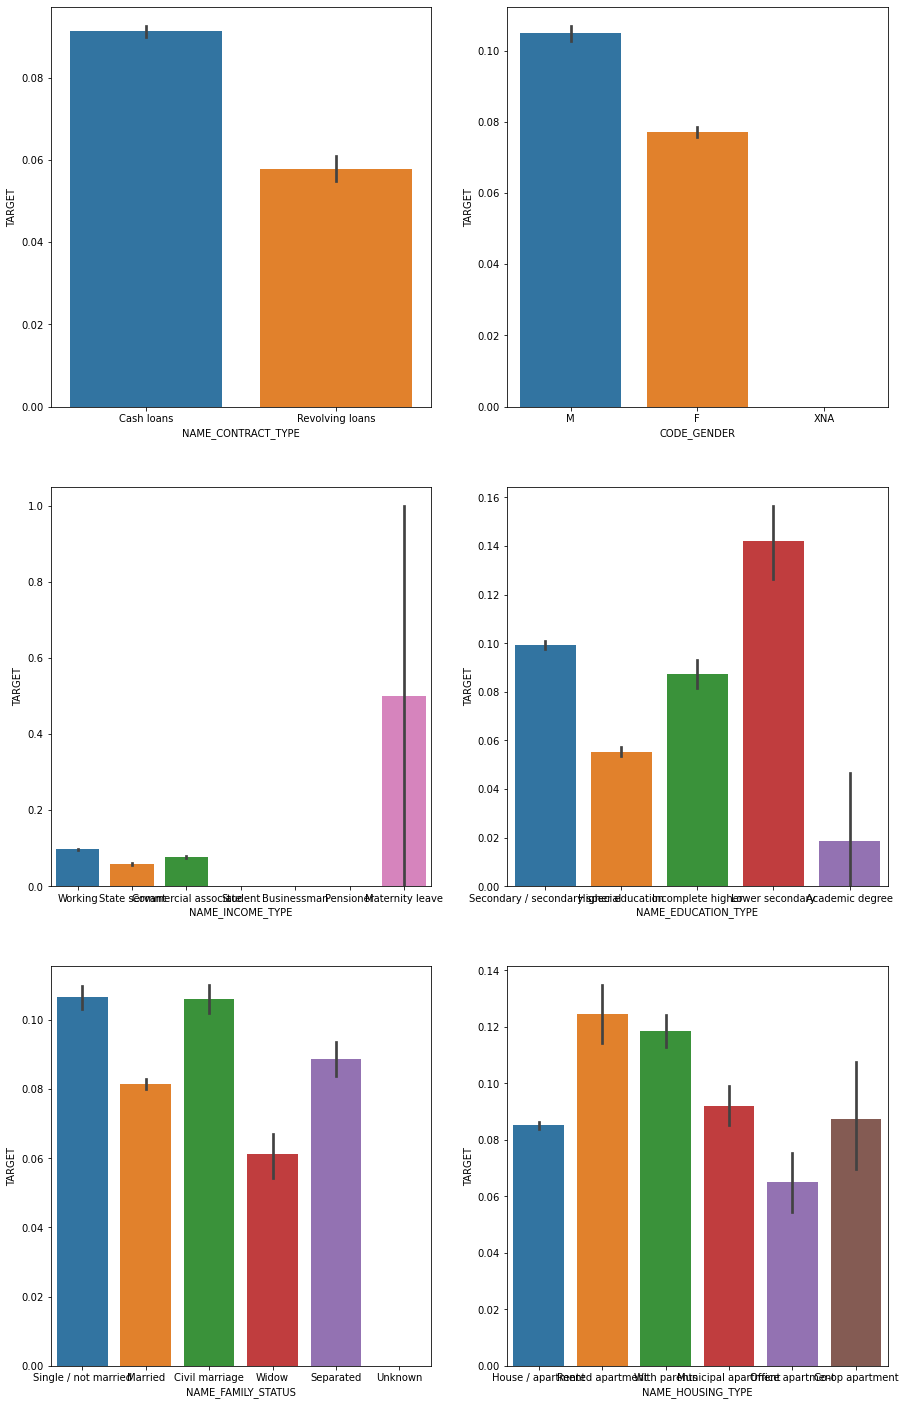

In [150]:
# Bivariate for Categorical Features

categorical_feature = ['NAME_CONTRACT_TYPE','CODE_GENDER', 'NAME_INCOME_TYPE',
                       'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

plt.figure(figsize=(15,25))
for i in (enumerate(categorical_feature)):
    plt.subplot(len(categorical_feature)//2,2,i[0]+1)
    sns.barplot(x=df_current_application[i[1]].dropna(),data=df_current_application,y='TARGET')
plt.show()

In [165]:
df_current_application.NAME_EDUCATION_TYPE.unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

- People take more cash loans compared to revolving loans
- Males take more loans. XNA could be people who do not wish to reveal gender
- People om maternity leave take more loan
- People with Lower secondary education take more loan
- People who are single take more loan

#### Moving on to check the correalation of numerical and categorical column with the target

In [133]:
#for Target=0
corr=df_current_application_target_0.corr()
corrdf=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf=corrdf.unstack().reset_index()
corrdf.columns=['Var1','Var2','Coorelation']
corrdf.dropna(subset=['Coorelation'],inplace=True)
corrdf['Coorelation']=round(corrdf['Coorelation'],2)
corrdf['Coorelation']=abs(corrdf['Coorelation']) #converting -ve values to +ve because they are same
corrdf.sort_values(by='Coorelation',ascending=False).head(10)

,Var1,Var2,Coorelation
82,AMT_GOODS_PRICE,AMT_CREDIT,0.99
83,AMT_GOODS_PRICE,AMT_ANNUITY,0.77
69,AMT_ANNUITY,AMT_CREDIT,0.76
68,AMT_ANNUITY,AMT_INCOME_TOTAL,0.43
81,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.36
55,AMT_CREDIT,AMT_INCOME_TOTAL,0.35
125,DAYS_EMPLOYED,DAYS_BIRTH,0.32
138,DAYS_REGISTRATION,DAYS_BIRTH,0.30
106,DAYS_BIRTH,CNT_CHILDREN,0.24
94,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,0.18


In [134]:
#for Target=1
corr=df_current_application_target_1.corr()
corrdf=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf=corrdf.unstack().reset_index()
corrdf.columns=['Var1','Var2','Coorelation']
corrdf.dropna(subset=['Coorelation'],inplace=True)
corrdf['Coorelation']=round(corrdf['Coorelation'],2)
corrdf['Coorelation']=abs(corrdf['Coorelation']) #converting -ve values to +ve because they are same
corrdf.sort_values(by='Coorelation',ascending=False).head(10)

,Var1,Var2,Coorelation
82,AMT_GOODS_PRICE,AMT_CREDIT,0.98
83,AMT_GOODS_PRICE,AMT_ANNUITY,0.75
69,AMT_ANNUITY,AMT_CREDIT,0.75
125,DAYS_EMPLOYED,DAYS_BIRTH,0.30
138,DAYS_REGISTRATION,DAYS_BIRTH,0.24
108,DAYS_BIRTH,AMT_CREDIT,0.19
110,DAYS_BIRTH,AMT_GOODS_PRICE,0.18
106,DAYS_BIRTH,CNT_CHILDREN,0.18
132,DAYS_REGISTRATION,CNT_CHILDREN,0.13
151,DAYS_ID_PUBLISH,DAYS_BIRTH,0.13


> Highest correlated features are (AMT_GOODS_PRICE, AMT_CREDIT), (AMT_GOODS_PRICE, AMT_ANNUITY), (AMT_ANNUITY, AMT_CREDIT)

### Moving on to previous_application data

In [151]:
df_previous_application = pd.read_csv('previous_application.csv')
df_previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
df_previous_application.shape

(1670214, 37)

In [153]:
df_previous_application.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [154]:
df_previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [155]:
df_previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [156]:
100*df_previous_application.isnull().sum()/df_previous_application.shape[0]

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

#### Feature with more the 50% of records missing should be dropped

In [157]:
df_previous_application.drop(['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'], axis=1, inplace=True)

#### Converting negative values to positive

In [158]:
df_previous_application[200:210]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
200,1566930,147254,Revolving loans,7875.000,157500.0,157500.0,157500.0,FRIDAY,12,Y,1,XAP,Refused,-607,XNA,LIMIT,NaN,Repeater,XNA,Cards,walk-in,Country-wide,30,Connectivity,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
201,2395238,316116,Consumer loans,8279.685,71996.4,74524.5,71996.4,MONDAY,16,Y,1,XAP,Approved,-1274,Cash through the bank,XAP,Unaccompanied,Repeater,Audio/Video,POS,XNA,Stone,470,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1243.0,-973.0,-973.0,-946.0,0.0
202,2426645,170611,Consumer loans,4214.115,14791.5,14791.5,14791.5,FRIDAY,11,Y,1,XAP,Approved,-2617,Cash through the bank,XAP,Unaccompanied,Repeater,Audio/Video,POS,XNA,Stone,27,Consumer electronics,4.0,high,POS household with interest,365243.0,-2583.0,-2493.0,-2493.0,-2489.0,0.0
203,1984290,316076,Consumer loans,8661.645,80028.0,77962.5,80028.0,TUESDAY,8,Y,1,XAP,Approved,-2526,Cash through the bank,XAP,NaN,New,Furniture,POS,XNA,Stone,120,Furniture,10.0,low_normal,POS industry with interest,365243.0,-2485.0,-2215.0,-2215.0,-2213.0,1.0
204,1449731,169854,Consumer loans,15391.440,80460.0,84708.0,80460.0,THURSDAY,11,Y,1,XAP,Approved,-826,Cash through the bank,XAP,Unaccompanied,Refreshed,Sport and Leisure,POS,XNA,Stone,90,Construction,6.0,middle,POS other with interest,365243.0,-787.0,-637.0,-697.0,-689.0,0.0
205,2253483,186271,Consumer loans,24160.500,157500.0,157500.0,157500.0,SATURDAY,8,Y,1,XAP,Approved,-1434,Cash through the bank,XAP,"Spouse, partner",New,Sport and Leisure,POS,XNA,Stone,90,Construction,8.0,high,POS other with interest,365243.0,-1403.0,-1193.0,-1193.0,-1188.0,0.0
206,2431767,256460,Consumer loans,8621.460,103455.0,91039.5,103455.0,MONDAY,16,Y,1,XAP,Refused,-2500,Cash through the bank,LIMIT,Unaccompanied,Repeater,Consumer Electronics,POS,XNA,Country-wide,1800,Consumer electronics,12.0,low_normal,POS household with interest,NaN,NaN,NaN,NaN,NaN,NaN
207,1033218,191478,Consumer loans,7300.530,39465.0,35505.0,39465.0,WEDNESDAY,7,Y,0,XAP,Approved,-723,Non-cash from your account,XAP,NaN,Refreshed,Mobile,POS,XNA,Country-wide,27,Connectivity,6.0,high,POS mobile with interest,365243.0,-686.0,-536.0,-566.0,-551.0,0.0
208,1063365,138457,Consumer loans,NaN,0.0,0.0,NaN,MONDAY,14,Y,1,XAP,Canceled,-398,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Country-wide,15,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN
209,1897704,142422,Consumer loans,17578.620,104355.0,98878.5,104355.0,WEDNESDAY,15,Y,1,XAP,Approved,-400,Cash through the bank,XAP,NaN,Repeater,Computers,POS,XNA,Regional / Local,150,Consumer electronics,6.0,low_normal,POS household with interest,365243.0,-369.0,-219.0,-219.0,-214.0,0.0


In [159]:
df_previous_application['DAYS_DECISION']=df_previous_application['DAYS_DECISION'].abs()
df_previous_application['SELLERPLACE_AREA']=df_previous_application['SELLERPLACE_AREA'].abs()
df_previous_application['DAYS_FIRST_DRAWING']=df_previous_application['DAYS_FIRST_DRAWING'].abs()
df_previous_application['DAYS_FIRST_DUE']=df_previous_application['DAYS_FIRST_DUE'].abs()
df_previous_application['DAYS_LAST_DUE_1ST_VERSION']=df_previous_application['DAYS_LAST_DUE_1ST_VERSION'].abs()
df_previous_application['DAYS_LAST_DUE']=df_previous_application['DAYS_LAST_DUE'].abs()
df_previous_application['DAYS_TERMINATION']=df_previous_application['DAYS_TERMINATION'].abs()

In [160]:
df_previous_application[200:210]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
200,1566930,147254,Revolving loans,7875.000,157500.0,157500.0,157500.0,FRIDAY,12,Y,1,XAP,Refused,607,XNA,LIMIT,NaN,Repeater,XNA,Cards,walk-in,Country-wide,30,Connectivity,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
201,2395238,316116,Consumer loans,8279.685,71996.4,74524.5,71996.4,MONDAY,16,Y,1,XAP,Approved,1274,Cash through the bank,XAP,Unaccompanied,Repeater,Audio/Video,POS,XNA,Stone,470,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,1243.0,973.0,973.0,946.0,0.0
202,2426645,170611,Consumer loans,4214.115,14791.5,14791.5,14791.5,FRIDAY,11,Y,1,XAP,Approved,2617,Cash through the bank,XAP,Unaccompanied,Repeater,Audio/Video,POS,XNA,Stone,27,Consumer electronics,4.0,high,POS household with interest,365243.0,2583.0,2493.0,2493.0,2489.0,0.0
203,1984290,316076,Consumer loans,8661.645,80028.0,77962.5,80028.0,TUESDAY,8,Y,1,XAP,Approved,2526,Cash through the bank,XAP,NaN,New,Furniture,POS,XNA,Stone,120,Furniture,10.0,low_normal,POS industry with interest,365243.0,2485.0,2215.0,2215.0,2213.0,1.0
204,1449731,169854,Consumer loans,15391.440,80460.0,84708.0,80460.0,THURSDAY,11,Y,1,XAP,Approved,826,Cash through the bank,XAP,Unaccompanied,Refreshed,Sport and Leisure,POS,XNA,Stone,90,Construction,6.0,middle,POS other with interest,365243.0,787.0,637.0,697.0,689.0,0.0
205,2253483,186271,Consumer loans,24160.500,157500.0,157500.0,157500.0,SATURDAY,8,Y,1,XAP,Approved,1434,Cash through the bank,XAP,"Spouse, partner",New,Sport and Leisure,POS,XNA,Stone,90,Construction,8.0,high,POS other with interest,365243.0,1403.0,1193.0,1193.0,1188.0,0.0
206,2431767,256460,Consumer loans,8621.460,103455.0,91039.5,103455.0,MONDAY,16,Y,1,XAP,Refused,2500,Cash through the bank,LIMIT,Unaccompanied,Repeater,Consumer Electronics,POS,XNA,Country-wide,1800,Consumer electronics,12.0,low_normal,POS household with interest,NaN,NaN,NaN,NaN,NaN,NaN
207,1033218,191478,Consumer loans,7300.530,39465.0,35505.0,39465.0,WEDNESDAY,7,Y,0,XAP,Approved,723,Non-cash from your account,XAP,NaN,Refreshed,Mobile,POS,XNA,Country-wide,27,Connectivity,6.0,high,POS mobile with interest,365243.0,686.0,536.0,566.0,551.0,0.0
208,1063365,138457,Consumer loans,NaN,0.0,0.0,NaN,MONDAY,14,Y,1,XAP,Canceled,398,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Country-wide,15,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN
209,1897704,142422,Consumer loans,17578.620,104355.0,98878.5,104355.0,WEDNESDAY,15,Y,1,XAP,Approved,400,Cash through the bank,XAP,NaN,Repeater,Computers,POS,XNA,Regional / Local,150,Consumer electronics,6.0,low_normal,POS household with interest,365243.0,369.0,219.0,219.0,214.0,0.0


#### Checking the dependent variable

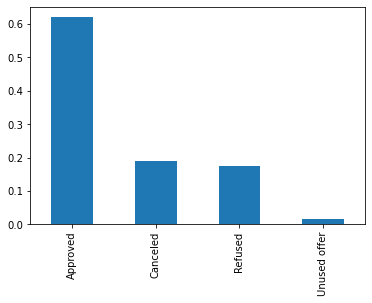

In [161]:
df_previous_application.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar()
plt.show()

#### Merging Current Application and Previous Application datasets fro furthur analysis. Using left join because I want all records from current application as we need to see if they need to be approved or not

In [162]:
previous_current_df=pd.merge(df_current_application,df_previous_application,how='left',on='SK_ID_CURR',suffixes=('_Current', '_Previous'))

In [163]:
previous_current_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_Current,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_Current,AMT_ANNUITY_Current,AMT_GOODS_PRICE_Current,NAME_TYPE_SUITE_Current,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_Category,AMT_CREDIT_Category,SK_ID_PREV,NAME_CONTRACT_TYPE_Previous,AMT_ANNUITY_Previous,AMT_APPLICATION,AMT_CREDIT_Previous,AMT_GOODS_PRICE_Previous,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_Previous,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,Business Entity Type 3,1.0,medium,Low,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,School,0.0,High,High,1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,School,0.0,High,High,2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17.0,Y,1.0,XAP,Approved,828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,School,0.0,High,High,2396755.0,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15.0,Y,1.0,XAP,Approved,2341.0,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,2310.0,1980.0,1980.0,1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,Government,0.0,NaN,NaN,1564014.0,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5.0,Y,1.0,XAP,Approved,815.0,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,365243.0,784.0,694.0,724.0,714.0,0.0


In [164]:
previous_current_df.shape

(967424, 58)

In [167]:
previous_current_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_Current', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_Current', 'AMT_ANNUITY_Current', 'AMT_GOODS_PRICE_Current',
       'NAME_TYPE_SUITE_Current', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'AMT_INCOME_TOTAL_Category', 'AMT_CREDIT_Category', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPE_Previous', 'AMT_ANNUITY_Previous',
       'AMT_APPLICATION', 'AMT_CREDIT_Previous', 'AMT_GOODS_PRICE_Previous',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_

### Univariate Analysis

#### Categorical Features
#### Numerical Features

In [ ]:
#Categorical Univariate Analysis

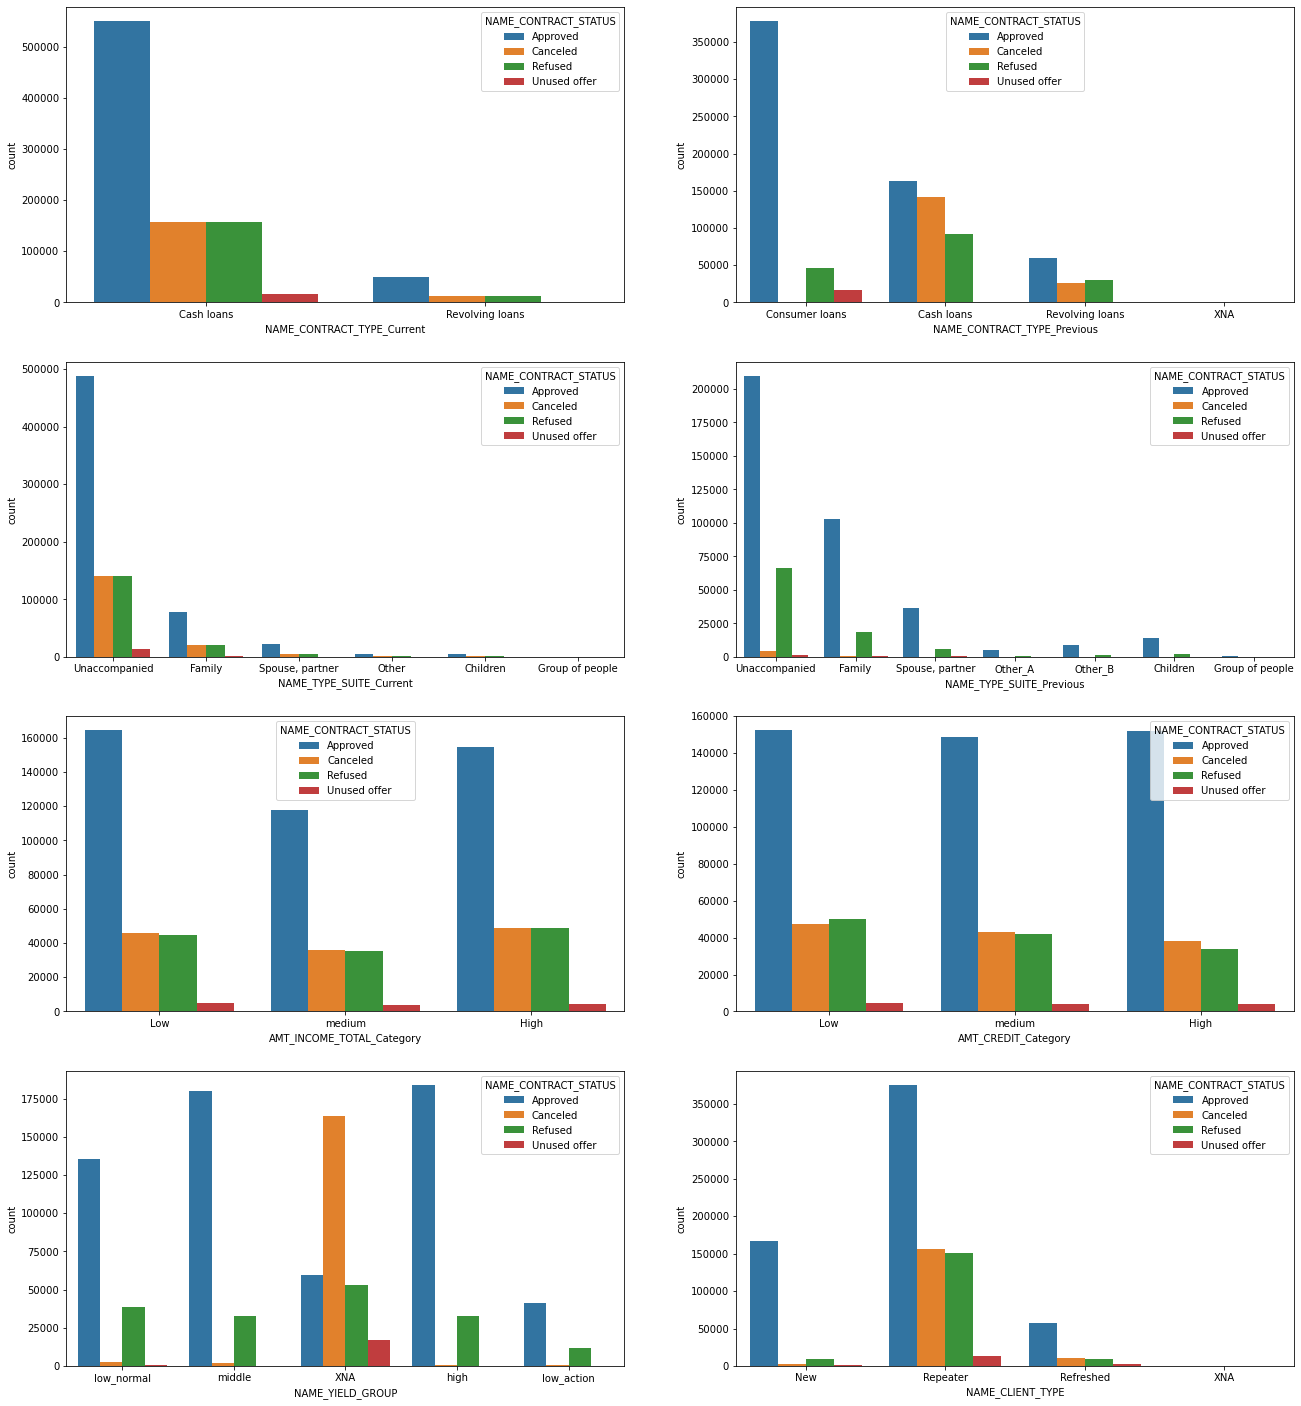

In [170]:
categorical_features=['NAME_CONTRACT_TYPE_Current','NAME_CONTRACT_TYPE_Previous',
                     'NAME_TYPE_SUITE_Current','NAME_TYPE_SUITE_Previous',
                    'AMT_INCOME_TOTAL_Category','AMT_CREDIT_Category','NAME_YIELD_GROUP','NAME_CLIENT_TYPE']


plt.figure(figsize=(22,25))
for i in (enumerate(categorical_features)):
    plt.subplot(len(categorical_features)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='NAME_CONTRACT_STATUS',data=previous_current_df)
plt.show()

- Previously consumer loans were highest and currently cash loans are highest
- Previously bank was aditionally providing consumer loan as well
- Mostly people were unaccompnied in both case
- People with low income get more loans approved
- Amount credit does not effect if loan gets approved or not
- Client type Repeater has most approved loans

In [172]:
#Numerical Univariate Analysis

ValueError: num must be 1 <= num <= 6, not 7

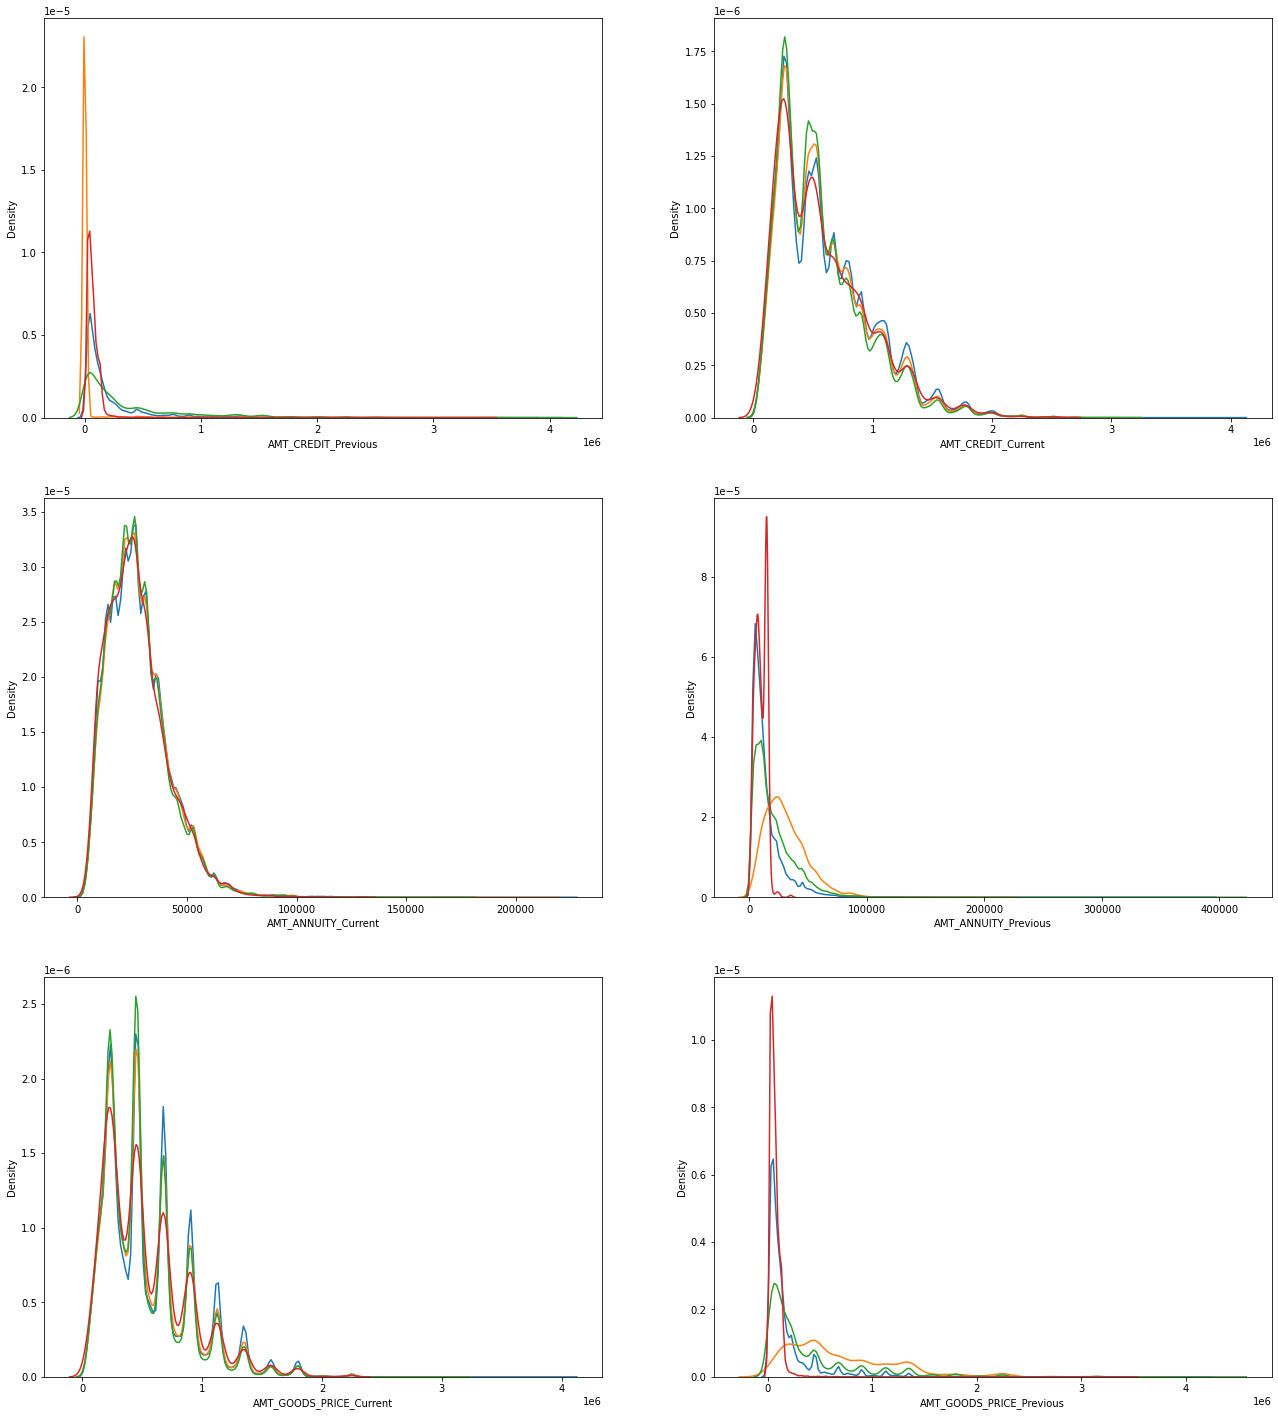

In [178]:
numerical_features=['AMT_CREDIT_Previous','AMT_CREDIT_Current','AMT_ANNUITY_Current','AMT_ANNUITY_Previous',
                   'AMT_GOODS_PRICE_Current','AMT_GOODS_PRICE_Previous','CNT_CHILDREN']
plt.figure(figsize=(22,25))
for i in (enumerate(numerical_features)):
    plt.subplot(len(numerical_features)//2,2,i[0]+1)
    sns.distplot(previous_current_df.loc[previous_current_df.NAME_CONTRACT_STATUS=='Approved',:][i[1]].dropna(),hist=False,label='Approved')
    sns.distplot(previous_current_df.loc[previous_current_df.NAME_CONTRACT_STATUS=='Canceled',:][i[1]].dropna(),hist=False,label='Canceled')
    sns.distplot(previous_current_df.loc[previous_current_df.NAME_CONTRACT_STATUS=='Refused',:][i[1]].dropna(),hist=False,label='Refused')
    sns.distplot(previous_current_df.loc[previous_current_df.NAME_CONTRACT_STATUS=='Unused offer',:][i[1]].dropna(),hist=False,label='Unused offer')

plt.show() 

- In previous dataset bank had high unused offers and in current dataset high number of refused offers for AMT_CREDIT.
- In previous dataset bank had high unused offers and in current dataset cancelled/refused offers are similar for AMT_ANNUITY.
- In previous dataset bank had high unused offers but in current dataset refused is high incase of AMT_GOODS_PRICE.

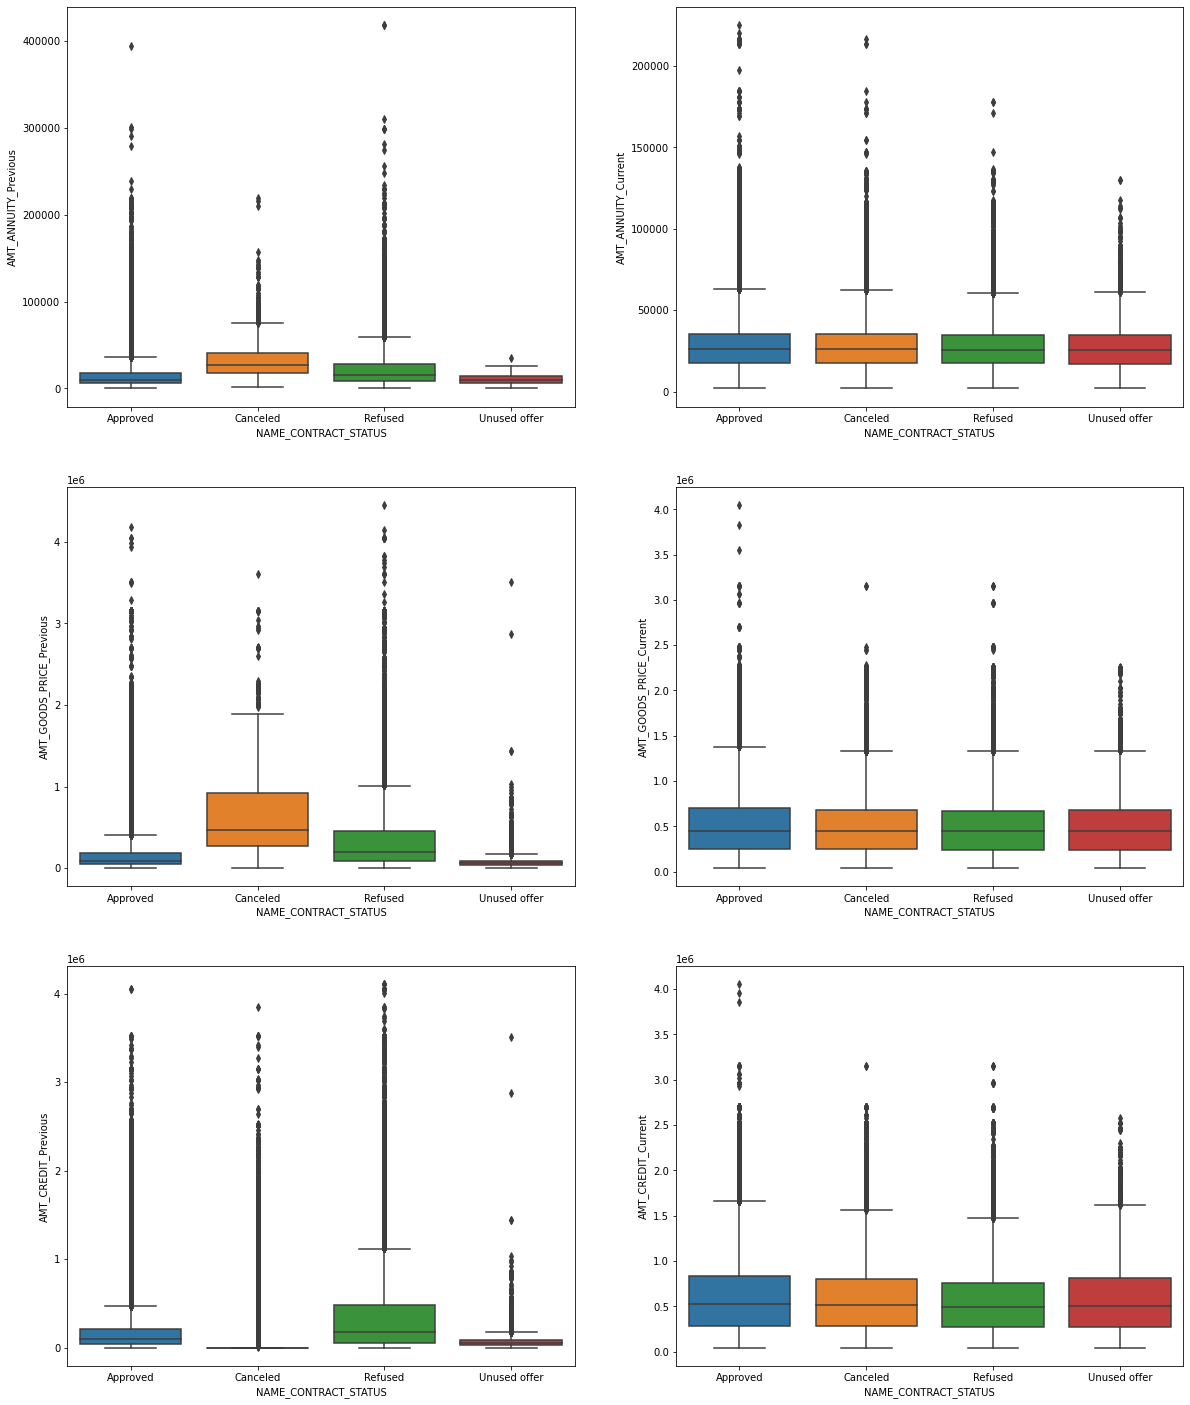

In [180]:
continous_numerical_features=['AMT_ANNUITY_Previous', 'AMT_ANNUITY_Current',
                   'AMT_GOODS_PRICE_Previous', 'AMT_GOODS_PRICE_Current',
                   'AMT_CREDIT_Previous','AMT_CREDIT_Current',]

plt.figure(figsize=(20,25))
for i in (enumerate(continous_numerical_features)):
    plt.subplot(len(continous_numerical_features)//2,2,i[0]+1)
    sns.boxplot(x='NAME_CONTRACT_STATUS',y=previous_current_df[i[1]].dropna(),data=previous_current_df)
plt.show() 

- In previous dataset most of the applications were cancelled or refused and in current dataset Refused/Cancelled/Approved/Unused all are same for AMT_ANNUITY. 
- In previous datase most of the applications were cancelled or refused and in current dataset Refused/Cancelled/Approved/Unused all are same for AMT_GOODS_PRICE.
- In previous dataset there are highest refused cased for AMT_CREDIT in current dataset it is same for all four category


### In conclusion

- Dependent variable to determine for Application dataset is TARGET
- Dependent variable to determine for Previous dataset is NAME_CONTRACT_STATUS

Strong indicators to consider for see weather to approve loan or not are as follow-

- NAME_EDUCATION_TYPE
- AMT_INCOME_TOTAL
- DAYS_BIRTH
- AMT_CREDIT
- DAYS_EMPLOYED
- AMT_ANNUITY
- NAME_INCOME_TYPE
- CODE_GENDER
- NAME_HOUSING_TYPE